In [176]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot  as plt

In [177]:
df = pd.read_excel("Data/Afluencia_Metro_2024.xlsx")

In [178]:
df = df.rename(columns={'Día':'Dia','Línea de Servicio':"Linea de Servicio"})

In [179]:
df['Dia'] = df['Dia'].str.replace(".","-")
df['Dia'] = pd.to_datetime(df['Dia'],format='%d-%m-%Y')

In [180]:
df_melted = pd.melt(df, id_vars=['Dia', 'Linea de Servicio'], var_name='Hora', value_name='Num pasajeros')

In [181]:
df_linea_hora = df_melted.groupby(['Linea de Servicio', 'Hora'])['Num pasajeros'].mean().reset_index()


In [182]:
df_linea_hora = df_linea_hora[~df_linea_hora['Hora'].str.contains("Total general \(Número de pasajeros\)", na=False)]


<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\User\AppData\Local\Temp\ipykernel_17308\3940219263.py:1: SyntaxWarning: invalid escape sequence '\('
  df_linea_hora = df_linea_hora[~df_linea_hora['Hora'].str.contains("Total general \(Número de pasajeros\)", na=False)]


In [183]:
print(df_linea_hora['Hora'].unique())

[datetime.time(4, 0) datetime.time(5, 0) datetime.time(6, 0)
 datetime.time(7, 0) datetime.time(8, 0) datetime.time(9, 0)
 datetime.time(10, 0) datetime.time(11, 0) datetime.time(12, 0)
 datetime.time(13, 0) datetime.time(14, 0) datetime.time(15, 0)
 datetime.time(16, 0) datetime.time(17, 0) datetime.time(18, 0)
 datetime.time(19, 0) datetime.time(20, 0) datetime.time(21, 0)
 datetime.time(22, 0) datetime.time(23, 0)]


In [132]:
#df_linea_hora['Hora'] = pd.to_datetime(df_linea_hora['Hora'], format='%H:%M:%S').dt.time

In [148]:
#df_linea_hora['Hora'] = pd.Categorical(df_linea_hora['Hora'], categories=sorted(df_linea_hora['Hora'].unique()), ordered=True)

In [184]:
plt.figure(figsize=(20, 6))

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

In [188]:
df_linea_hora['Hora'] = df_linea_hora['Hora'].astype(str).str[:-3]
df_linea_hora['Hora']

0      04:00
1      05:00
2      06:00
3      07:00
4      08:00
       ...  
246    19:00
247    20:00
248    21:00
249    22:00
250    23:00
Name: Hora, Length: 240, dtype: object

In [169]:
#df_linea_hora['Hora'] = pd.to_timedelta(df_linea_hora['Hora'].astype(str))

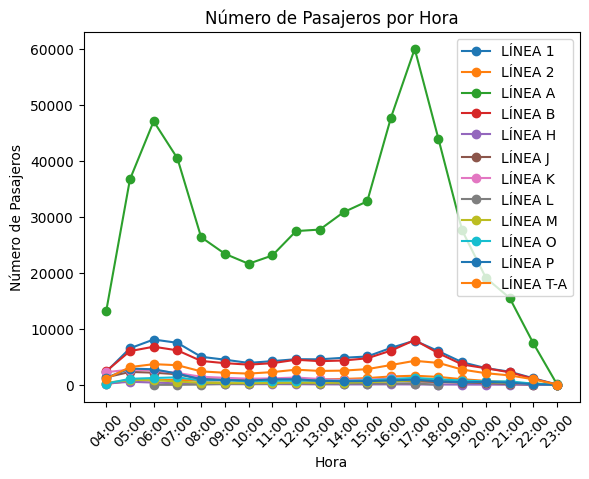

In [193]:
for linea in df_linea_hora['Linea de Servicio'].unique():
    subset = df_linea_hora[df_linea_hora['Linea de Servicio'] == linea]
    plt.plot(subset['Hora'].astype(str), subset['Num pasajeros'], marker='o', label=linea)

plt.xlabel('Hora')
plt.ylabel('Número de Pasajeros')
plt.title('Número de Pasajeros por Hora')
plt.legend()
plt.xticks(rotation=45)

plt.show()